In [75]:
#  Importar as Libs

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importar biblioteca para ignorar alguns avisos

import warnings
warnings.filterwarnings('ignore')

In [76]:
# Ler dados

Base_Dados = pd.read_csv('/content/Startups+in+2021+end.csv')

#Verificar a dimensão

Base_Dados.shape

(936, 8)

In [77]:
# Primeiros registros

Base_Dados.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [78]:
# Colunas

Base_Dados.columns

Index(['Unnamed: 0', 'Company', 'Valuation ($B)', 'Date Joined', 'Country',
       'City', 'Industry', 'Select Investors'],
      dtype='object')

In [79]:
# Renomear colunas

Base_Dados.rename( columns={
    'Unnamed: 0' : "Id",
    'Company' : 'Empresa',
    'Valuation ($B)' : 'Valor ($)',
    'Date Joined' : 'Data de Adesão',
    'Country' : 'País',
    'City' : 'Cidade',
    'Industry' : 'Setor',
    'Select Investors' : 'Investidores',
}, inplace=True )

In [80]:
# Verificar tipo da informação

Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              936 non-null    int64 
 1   Empresa         936 non-null    object
 2   Valor ($)       936 non-null    object
 3   Data de Adesão  936 non-null    object
 4   País            936 non-null    object
 5   Cidade          921 non-null    object
 6   Setor           936 non-null    object
 7   Investidores    935 non-null    object
dtypes: int64(1), object(7)
memory usage: 58.6+ KB


In [81]:
# Campos nulos

Base_Dados.isnull().sum()

Id                 0
Empresa            0
Valor ($)          0
Data de Adesão     0
País               0
Cidade            15
Setor              0
Investidores       1
dtype: int64

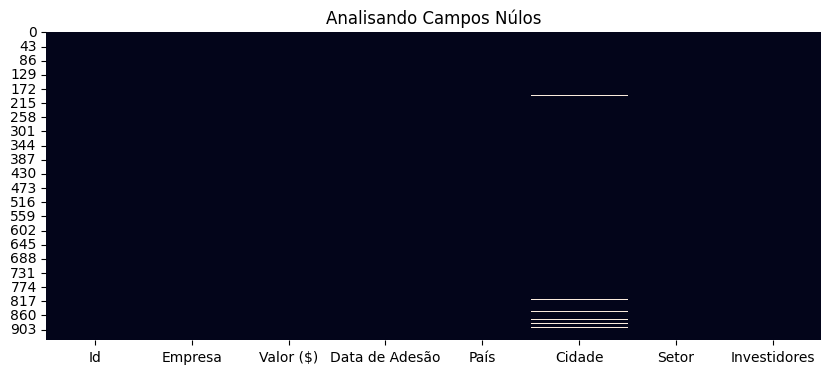

In [82]:
# Grafico para analisar os campos nulos

plt.figure(figsize= (10,4))
plt.title('Analisando Campos Núlos')
sns.heatmap( Base_Dados.isnull(), cbar=False );


In [83]:
# Campos únicos

Base_Dados.nunique()

Id                936
Empresa           935
Valor ($)         192
Data de Adesão    589
País               47
Cidade            239
Setor              17
Investidores      920
dtype: int64

In [84]:
# Valores únicos

Base_Dados['Setor'].unique()

array(['Artificial intelligence', 'Other', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics', 'Edtech',
       'E-commerce & direct-to-consumer', 'Hardware', 'Health',
       'Consumer & retail', 'Auto & transportation', 'Finttech',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Artificial Intelligence'], dtype=object)

In [85]:
# Valores únicos - Rank

Base_Dados['Setor'].value_counts()

Fintech                                190
Internet software & services           167
E-commerce & direct-to-consumer        102
Artificial intelligence                 69
Health                                  63
Supply chain, logistics, & delivery     51
Other                                   51
Cybersecurity                           41
Mobile & telecommunications             37
Data management & analytics             36
Hardware                                32
Auto & transportation                   29
Edtech                                  27
Consumer & retail                       23
Travel                                  13
Artificial Intelligence                  4
Finttech                                 1
Name: Setor, dtype: int64

In [86]:
# Valores únicos - Rank (Percentual)

Base_Dados['Setor'].value_counts( normalize=True)

Fintech                                0.202991
Internet software & services           0.178419
E-commerce & direct-to-consumer        0.108974
Artificial intelligence                0.073718
Health                                 0.067308
Supply chain, logistics, & delivery    0.054487
Other                                  0.054487
Cybersecurity                          0.043803
Mobile & telecommunications            0.039530
Data management & analytics            0.038462
Hardware                               0.034188
Auto & transportation                  0.030983
Edtech                                 0.028846
Consumer & retail                      0.024573
Travel                                 0.013889
Artificial Intelligence                0.004274
Finttech                               0.001068
Name: Setor, dtype: float64

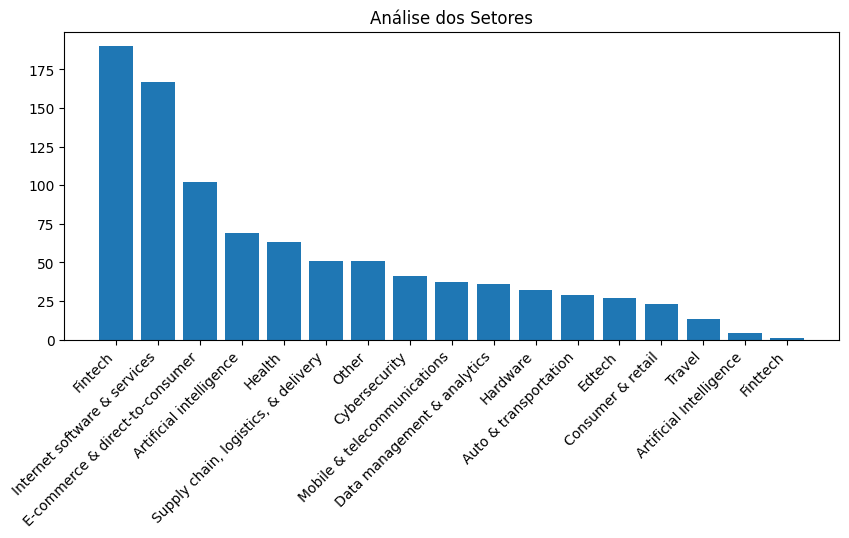

In [87]:
# Gráfico de Barras

plt.figure(figsize= (10,4))
plt.title('Análise dos Setores')
plt.bar( Base_Dados['Setor'].value_counts().index, Base_Dados['Setor'].value_counts() )
plt.xticks(rotation=45, ha= 'right');

In [88]:
# Corrigindo percentual

Analise = round(Base_Dados['País'].value_counts( normalize=True) * 100, 1)

In [89]:
Analise

United States           51.0
China                   18.1
India                    5.4
United Kingdom           4.0
Germany                  2.5
Israel                   2.2
France                   2.0
Canada                   1.6
Brazil                   1.6
South Korea              1.2
Singapore                1.2
Hong Kong                0.7
Japan                    0.6
Australia                0.6
Mexico                   0.5
Netherlands              0.5
Indonesia                0.4
Spain                    0.4
Sweden                   0.4
Switzerland              0.4
Ireland                  0.3
United Arab Emirates     0.3
Norway                   0.3
Belgium                  0.2
Thailand                 0.2
Denmark                  0.2
Philippines              0.2
Finland                  0.2
Colombia                 0.2
South Africa             0.2
Turkey                   0.2
Austria                  0.2
Chile                    0.1
Malaysia                 0.1
Czech Republic

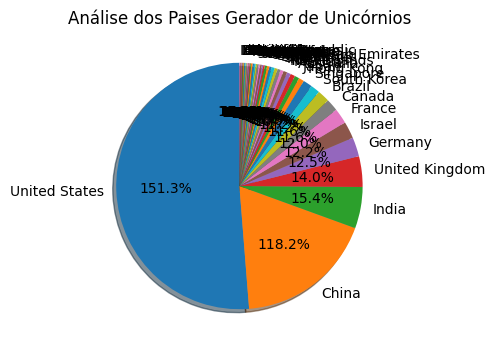

In [90]:
# Gráfico de Pizza

plt.figure(figsize= (10,4))
plt.title('Análise dos Paises Gerador de Unicórnios')
plt.pie(
    Analise,
    labels= Analise.index,
    shadow= True,
    startangle= 90,
    autopct= '1%.1f%%'
);

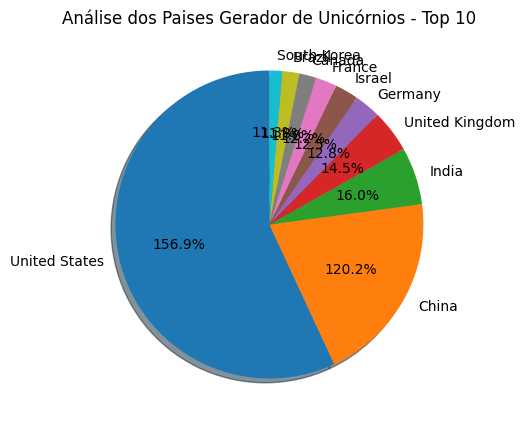

In [91]:
# Gráfico de Pizza - Top 10

plt.figure(figsize= (20,5))
plt.title('Análise dos Paises Gerador de Unicórnios - Top 10')
plt.pie(
    Analise.head(10),
    labels= Analise.index[0:10],
    shadow= True,
    startangle= 90,
    autopct= '1%.1f%%'
);

In [92]:
# Conversão para data

Base_Dados['Data de Adesão'] = pd.to_datetime(Base_Dados['Data de Adesão'])

Base_Dados['Data de Adesão'].head()

0   2017-04-07
1   2012-12-01
2   2014-01-23
3   2011-12-12
4   2018-01-08
Name: Data de Adesão, dtype: datetime64[ns]

In [93]:
# Extrais o Ano e Mês

Base_Dados['Mes'] = pd.DatetimeIndex(Base_Dados['Data de Adesão']).month
Base_Dados['Ano'] = pd.DatetimeIndex(Base_Dados['Data de Adesão']).year


Base_Dados.head()

,Id,Empresa,Valor ($),Data de Adesão,País,Cidade,Setor,Investidores,Mes,Ano
0,0,Bytedance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,$100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
3,3,Klarna,$45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011
4,4,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [94]:
# Tabela Analística

Analise_agrupada = Base_Dados.groupby(by= ['País', 'Ano', 'Mes', 'Empresa']).count() ['Id'].reset_index()

Analise_agrupada

,País,Ano,Mes,Empresa,Id
0,Argentina,2021,8,Uala,1
1,Australia,2018,1,Canva,1
2,Australia,2019,3,Airwallex,1
3,Australia,2021,5,SafetyCulture,1
4,Australia,2021,7,Culture Amp,1
...,...,...,...,...,...
931,United States,2021,12,Panther Labs,1
932,United States,2021,12,ReliaQuest,1
933,United States,2021,12,YipitData,1
934,"United States,",2021,9,TrialSpark,1


In [95]:
Analise_agrupada.loc[
    Analise_agrupada['País'] == 'Brazil'
]

,País,Ano,Mes,Empresa,Id
12,Brazil,2018,3,Nubank,1
13,Brazil,2018,7,Movile,1
14,Brazil,2018,11,iFood,1
15,Brazil,2019,6,Loggi,1
16,Brazil,2019,9,QuintoAndar,1
17,Brazil,2019,10,EBANX,1
18,Brazil,2019,12,Wildlife Studios,1
19,Brazil,2020,1,Loft,1
20,Brazil,2020,12,C6 Bank,1
21,Brazil,2020,12,Creditas,1


In [96]:
# Converter valores para flutuantes e tirar o sifão

Base_Dados ['Valor ($)'] = pd.to_numeric( Base_Dados ['Valor ($)'].apply ( lambda Linha : Linha.replace('$', '') ))

Base_Dados.head()

,Id,Empresa,Valor ($),Data de Adesão,País,Cidade,Setor,Investidores,Mes,Ano
0,0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
3,3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011
4,4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [100]:
# Tabela Analística

Analise_Pais = Base_Dados.groupby(by= ['País']).sum() ['Valor ($)'].reset_index()

Analise_Pais.head()

,País,Valor ($)
0,Argentina,2.45
1,Australia,50.60
2,Austria,5.81
3,Belgium,7.55
4,Bermuda,1.60


In [103]:
# Ordenar os valores do menor para o maior

Analise_Pais.sort_values('Valor ($)')

,País,Valor ($)
10,Croatia,1.00
45,"United States,",1.00
20,"Indonesia,",1.00
11,Czech Republic,1.20
26,Malaysia,1.30
7,Chile,1.50
4,Bermuda,1.60
33,Senegal,1.70
32,Santa Clara,2.00
29,Nigeria,2.00


In [105]:
# Ordenar os valores do maior para o menor

Analise_Pais.sort_values('Valor ($)', ascending=False)

,País,Valor ($)
44,United States,1604.03
8,China,569.48
43,United Kingdom,150.29
18,India,148.45
16,Germany,66.63
5,Brazil,61.05
38,Sweden,58.08
1,Australia,50.60
22,Israel,43.82
17,Hong Kong,41.45


In [106]:
# Plotar Valor

Analise_Valor = Analise_Pais.sort_values('Valor ($)', ascending=False)

Analise_Valor.head()

,País,Valor ($)
44,United States,1604.03
8,China,569.48
43,United Kingdom,150.29
18,India,148.45
16,Germany,66.63


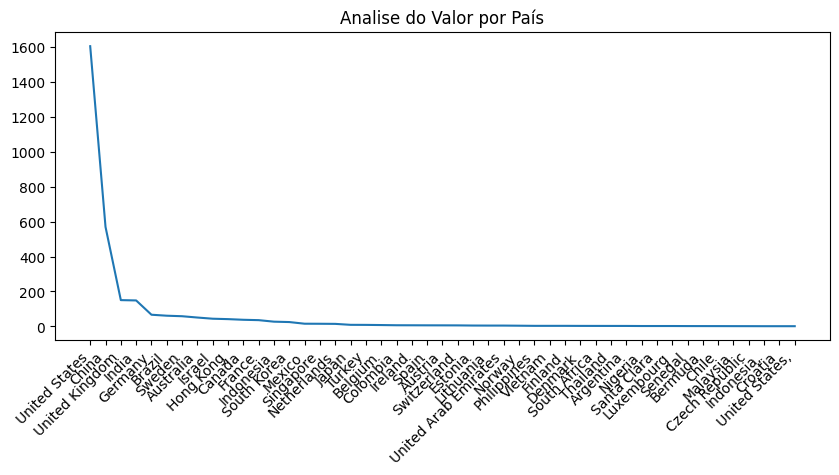

In [109]:
plt.figure(figsize= (10,4))
plt.plot(Analise_Valor['País'], Analise_Valor ['Valor ($)'])
plt.title('Analise do Valor por País')
plt.xticks(rotation=45, ha= 'right');